In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
data = pd.read_csv('DailyDelhiClimateTest (1).csv')

In [7]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [8]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [9]:
print("Number of missing values in each column:\n", data.isna().sum())

Number of missing values in each column:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [10]:
selected_features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [11]:
data = data.drop(['date'], axis=1)
scaler = MinMaxScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

In [12]:
X = data[selected_features]
y = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.100205731243333e-32


In [17]:
test_data = pd.concat([X_test, y_test], axis=1)

In [18]:
test_data.to_csv('test_data.csv', index=False)

In [19]:
test_data = pd.read_csv('test_data.csv')

In [20]:
test_data.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp.1,humidity.1,wind_speed.1,meanpressure.1
0,0.691489,0.348986,0.490886,0.986450,0.691489,0.348986,0.490886,0.986450
1,0.314421,0.732480,0.106684,0.991206,0.314421,0.732480,0.106684,0.991206
2,0.156028,0.691925,0.428363,0.992589,0.156028,0.691925,0.428363,0.992589
3,0.320567,0.546211,0.233124,0.986502,0.320567,0.546211,0.233124,0.986502
4,0.000000,0.696194,0.467720,0.993742,0.000000,0.696194,0.467720,0.993742


In [21]:
test_data[selected_features] = scaler.transform(test_data[selected_features])
X_test_new = test_data[selected_features]

In [22]:
y_pred_new = model.predict(X_test_new)

In [23]:
print("Predicted weather labels for the test data:")
print(y_pred_new)

Predicted weather labels for the test data:
[[-0.43866003 -0.22285183 -0.05001535 -0.06019192]
 [-0.4547055  -0.2179405  -0.07144706 -0.06018699]
 [-0.4614456  -0.21845988 -0.05350303 -0.06018555]
 [-0.45444394 -0.220326   -0.06439391 -0.06019187]
 [-0.46808511 -0.21840521 -0.05130756 -0.06018436]
 [-0.45618573 -0.21912635 -0.06442355 -0.06018027]
 [-0.45654142 -0.22094516 -0.05795014 -0.06018654]
 [-0.44898967 -0.22158444 -0.04977844 -0.06019283]
 [-0.44943413 -0.21966994 -0.0528392  -0.06018466]
 [-0.46665555 -0.21800044 -0.06109662 -0.0601848 ]
 [-0.43888637 -0.22676769 -0.0377631  -0.06019098]
 [-0.45742166 -0.21880613 -0.05357217 -0.0601852 ]
 [-0.44001811 -0.22377442 -0.04927633 -0.06019179]
 [-0.42847442 -0.22572209 -0.05071548 -0.06020013]
 [-0.46153183 -0.21790795 -0.04954675 -0.06017787]
 [-0.45918869 -0.21614861 -0.07317877 -0.06121542]
 [-0.45540969 -0.220993   -0.06764389 -0.0601846 ]
 [-0.45812585 -0.21759652 -0.03703704 -0.06018291]
 [-0.43730195 -0.22207276 -0.07086362 

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
y_pred = model.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Absolute Error: 8.849287391310565e-17
Mean Squared Error: 3.100205731243333e-32
R-squared Score: 1.0


In [28]:
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

NameError: name 'accuracy_score' is not defined

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

ValueError: continuous-multioutput is not supported

In [31]:
fig = plt.figure(figsize=(15,8))
plt.plot(test_df.index,test_df.meantemp,label='Real Values',color='blue')
plt.plot(test_df.index,Predictions,label='Predicted Values',color = "red")
plt.title('Comparison Between The Real Values and The Predicted Values for The Temperature')
plt.legend()
plt.show()

NameError: name 'test_df' is not defined

<Figure size 1500x800 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

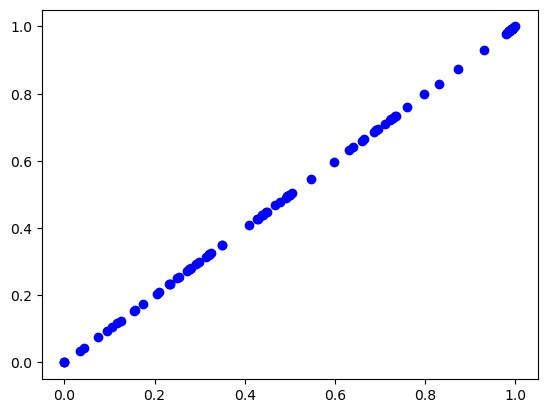

In [35]:
plt.plot(X_test, y_test, 'bo', label='Original Data')

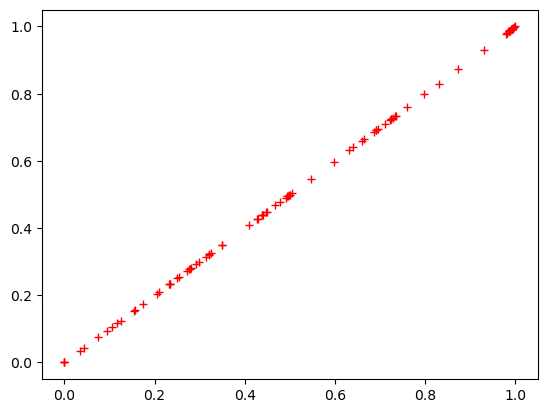

In [36]:
plt.plot(X_test, y_pred, 'r+', label='Predicted Data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Target Variable')

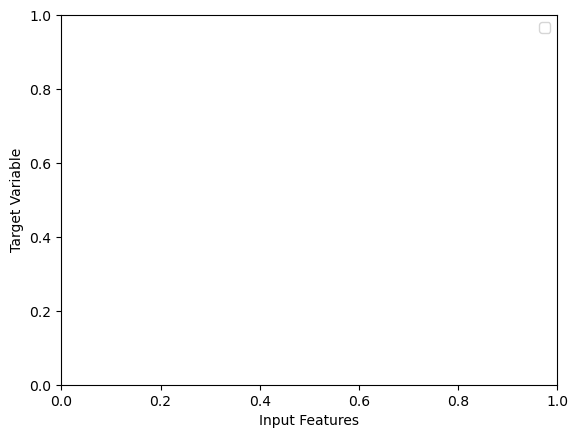

In [37]:
plt.legend(loc='best')
plt.xlabel('Input Features')
plt.ylabel('Target Variable')

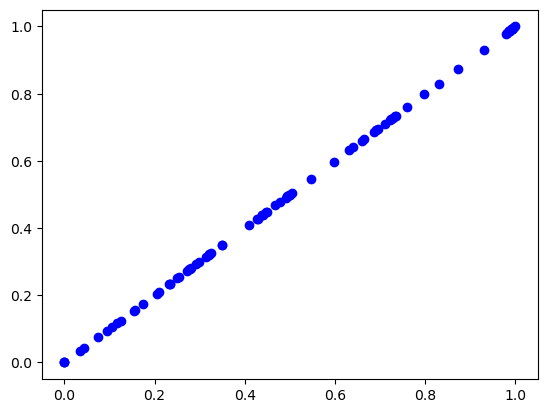

In [40]:
plt.scatter(X_test, y_test, color='blue', label='Original Data')

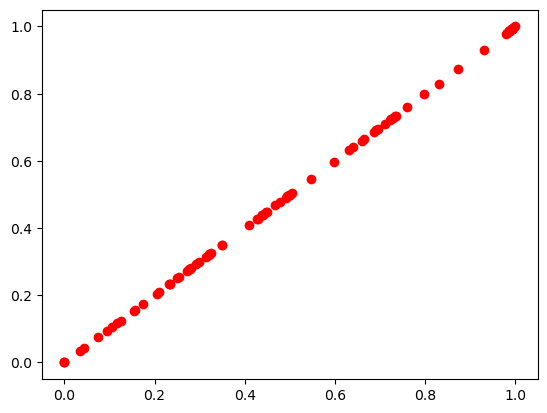

In [41]:
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'x_test' is not defined

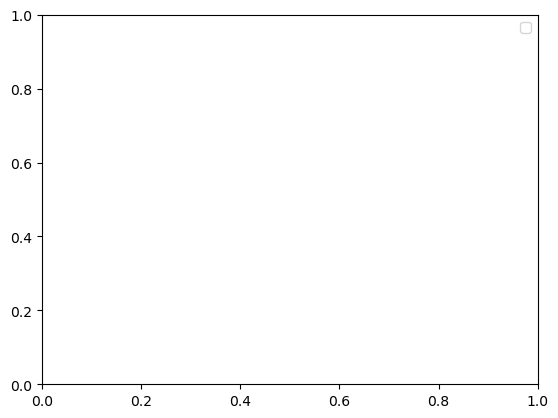

In [44]:
plt.legend(loc='best')
plt.xlabel(X_test)
plt.ylabel(y_pred)

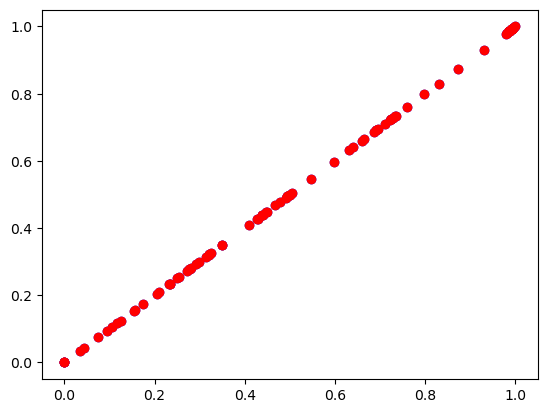

In [45]:
plt.scatter(X_test, y_test, color='blue', label='Original Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')